In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [2]:
iris_df = pd.read_csv('IRIS.csv')

iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Display information about the dataset
iris_df.info()

# Display summary statistics
iris_df.describe()

# Check the distribution of target labels
iris_df['species'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
# Features (X) are all columns except the target variable 'species'
X = iris_df.drop('species', axis=1)

# Target variable (y) is 'species'
y = iris_df['species']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)



KNeighborsClassifier(n_neighbors=3)

In [8]:
y_pred = knn_model.predict(X_test_scaled)


In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [10]:
from sklearn.model_selection import cross_val_score

# Assuming knn_model and X_scaled are already defined

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_model,X_test_scaled, y_pred, cv=5)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [1.         1.         0.83333333 0.83333333 1.        ]
Mean Accuracy: 0.9333333333333333


In [11]:
from sklearn.model_selection import cross_val_score

# Assuming knn_model and X_scaled are already defined

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_model,X_test_scaled, y_pred, cv=5)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [1.         1.         0.83333333 0.83333333 1.        ]
Mean Accuracy: 0.9333333333333333


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are your training data
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Display feature importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
        Feature  Importance
3   petal_width    0.471639
2  petal_length    0.397896
0  sepal_length    0.099180
1   sepal_width    0.031284


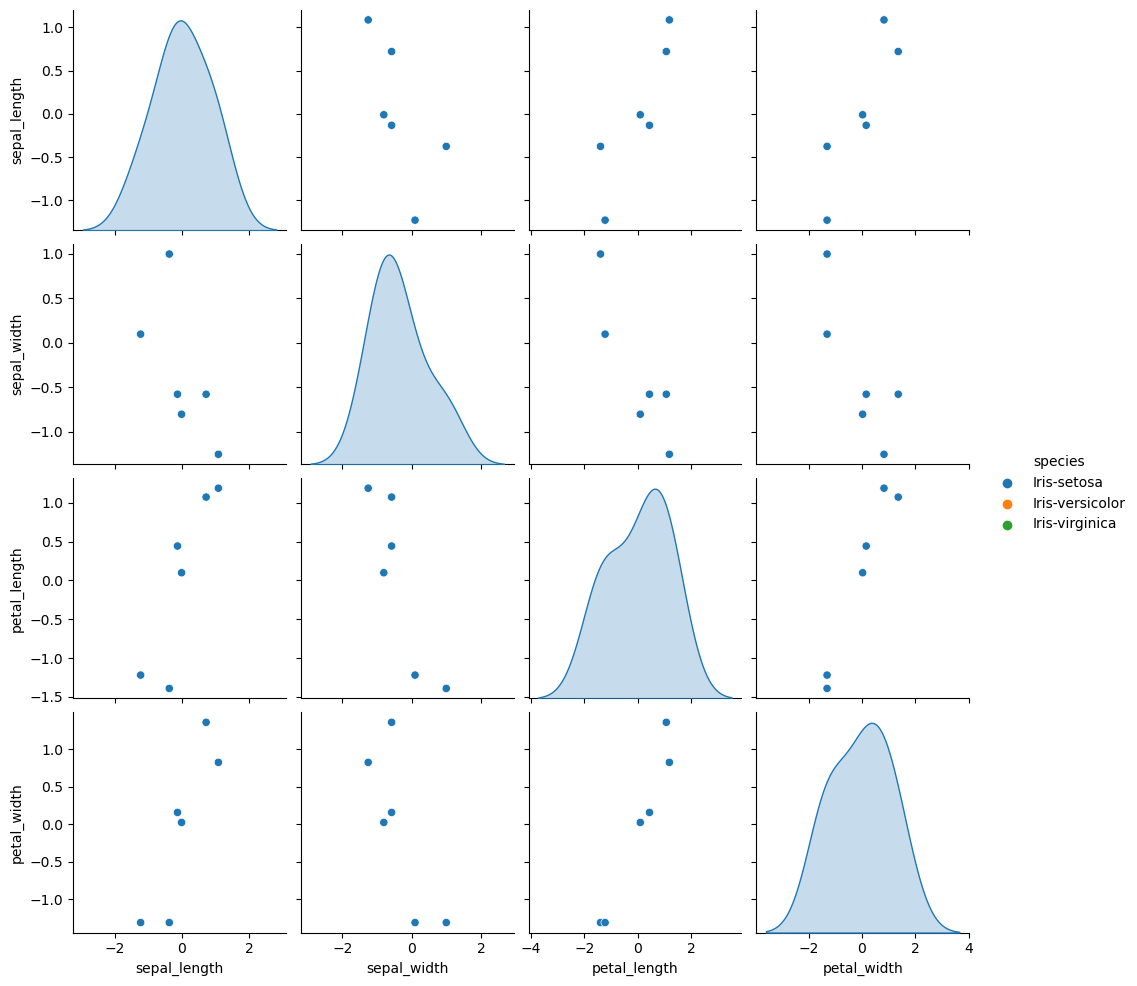

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming X_scaled is a NumPy array
# Convert X_scaled to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Concatenate features and target variable for visualization
df_to_plot = pd.concat([X_test_scaled_df, pd.Series(y_test, name='species')], axis=1)

# Display a pairplot for visualization
sns.pairplot(df_to_plot, hue='species')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

# Display the best hyperparameters for KNN
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)


Best Hyperparameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are your training data
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the performance of Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest Classification Report:\n{classification_rep_rf}")


Random Forest Accuracy: 1.00
Random Forest Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [22]:
# Display feature importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
        Feature  Importance
2  petal_length    0.481868
3   petal_width    0.379410
0  sepal_length    0.109796
1   sepal_width    0.028926


In [23]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)

# Predictions using SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the performance of SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Confusion Matrix:\n{conf_matrix_svm}")
print(f"SVM Classification Report:\n{classification_rep_svm}")


SVM Accuracy: 0.97
SVM Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [27]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Predictions using Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the performance of Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree Confusion Matrix:\n{conf_matrix_dt}")
print(f"Decision Tree Classification Report:\n{classification_rep_dt}")


Decision Tree Accuracy: 1.00
Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision Tree Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [29]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Predictions using Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the performance of Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree Confusion Matrix:\n{conf_matrix_dt}")
print(f"Decision Tree Classification Report:\n{classification_rep_dt}")


Decision Tree Accuracy: 1.00
Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision Tree Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [30]:
from sklearn.ensemble import VotingClassifier

# Creating a Voting Classifier with KNN, Random Forest, and SVM
voting_clf = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(kernel='linear', C=1))
], voting='hard')

# Fitting the Voting Classifier on the training data
voting_clf.fit(X_train_scaled, y_train)

# Predictions using the Voting Classifier
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate the performance of the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)

print(f"Voting Classifier Accuracy: {accuracy_voting:.2f}")
print(f"Voting Classifier Confusion Matrix:\n{conf_matrix_voting}")
print(f"Voting Classifier Classification Report:\n{classification_rep_voting}")


Voting Classifier Accuracy: 1.00
Voting Classifier Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Voting Classifier Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



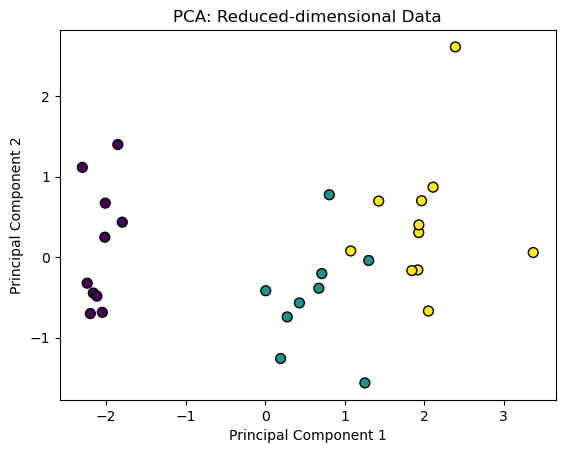

In [31]:
from sklearn.decomposition import PCA

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Convert species names to numerical labels
species_labels = y_test.astype('category').cat.codes

# Visualizing the reduced-dimensional data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=species_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA: Reduced-dimensional Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [32]:
from sklearn.model_selection import cross_val_score

# Defining the models you want to compare (e.g., KNN, Random Forest, SVM, Decision Tree)
models = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(kernel='linear', C=1)),
    ('Decision Tree', DecisionTreeClassifier())
]

# Evaluating each model using cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f'{name} Mean Accuracy: {np.mean(scores):.2f} (Std: {np.std(scores):.2f})')


KNN Mean Accuracy: 0.95 (Std: 0.06)
Random Forest Mean Accuracy: 0.95 (Std: 0.04)
SVM Mean Accuracy: 0.95 (Std: 0.06)
Decision Tree Mean Accuracy: 0.94 (Std: 0.03)


In [33]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Creating the grid search object
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

# Displaying the best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


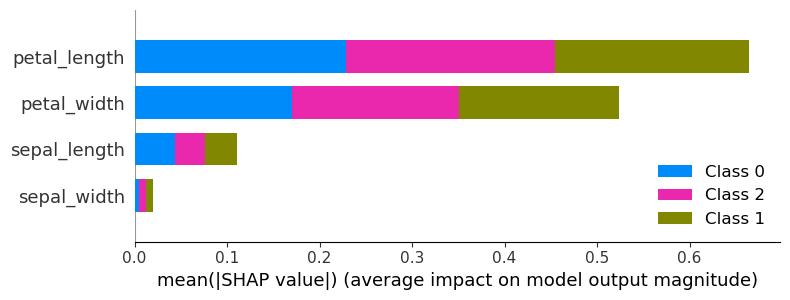

In [34]:
!pip install shap

import shap

# Assuming rf_model is your trained Random Forest model
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary Plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar')



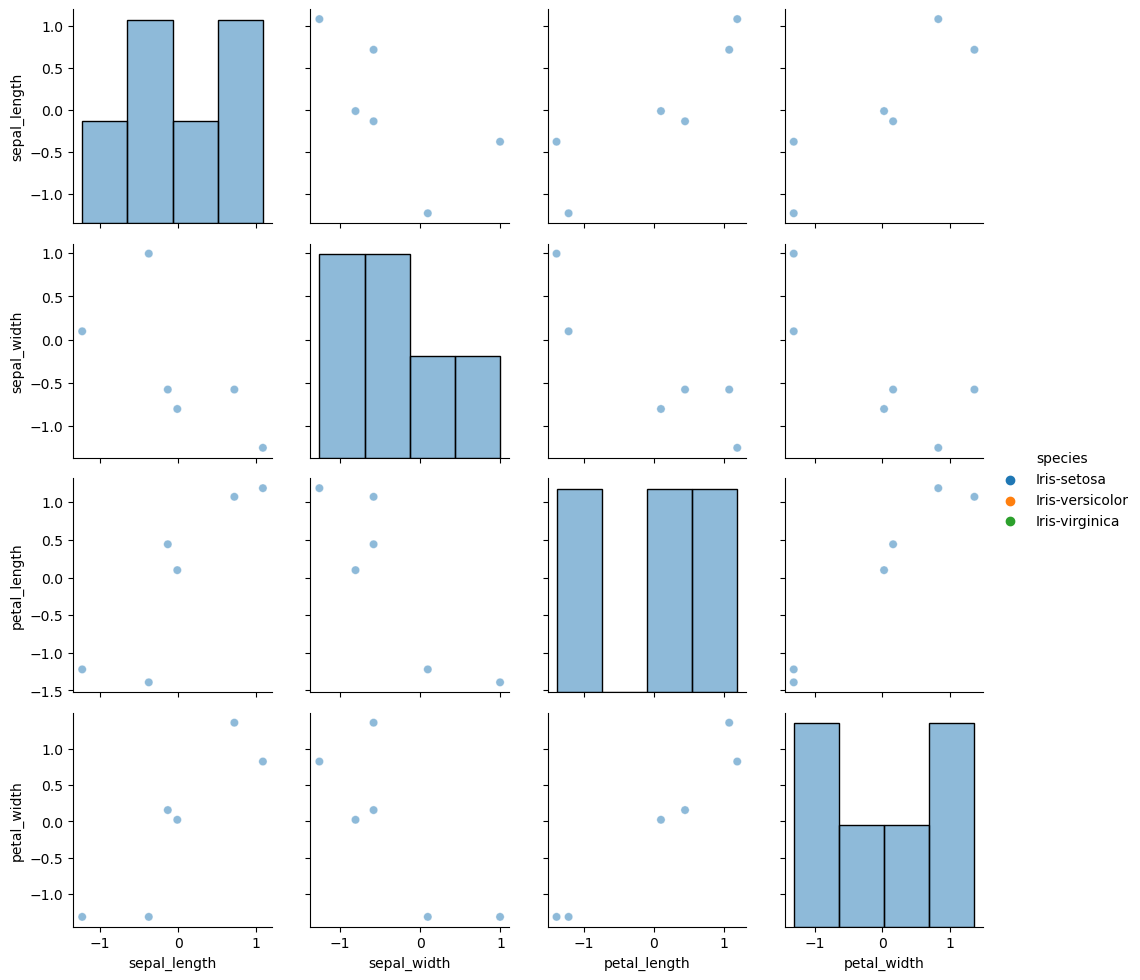

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_scaled is a NumPy array
# Converting X_scaled to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Concatenating features and target variable for visualization
df_to_plot = pd.concat([X_test_scaled_df, pd.Series(y_test, name='species')], axis=1)

# Using Seaborn scatterplot for custom scatter plot function
def custom_scatter(x, y, hue, **kwargs):
    sns.scatterplot(x=x, y=y, alpha=0.5, hue=hue, **kwargs)

# Using PairGrid with the custom scatter plot function
g = sns.PairGrid(df_to_plot, hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(custom_scatter)
g.add_legend()
plt.show()
